In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [64]:
df=pd.read_csv('crime_data.csv')

In [65]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


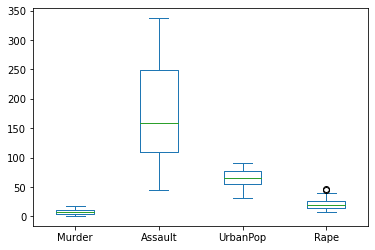

In [67]:
df.plot(kind="box")
plt.show()

In [68]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data=sc.fit_transform(df.iloc[:,1:])

In [69]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

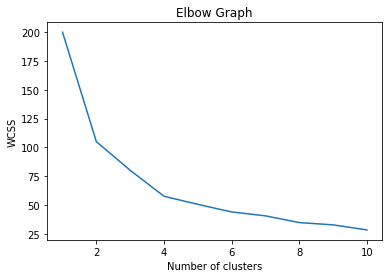

In [70]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [71]:
wcss

[200.0,
 104.96163315756871,
 80.0888613219962,
 57.55425863091104,
 50.52026552535068,
 43.927464044975736,
 40.52183461131976,
 34.68738839784909,
 32.70648136388185,
 28.31163939712256]

In [82]:
clusters=KMeans(n_clusters=4,random_state=30)
clusters.fit(data)

KMeans(n_clusters=4, random_state=30)

In [83]:
clusters.labels_

array([0, 3, 3, 0, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1, 3,
       2, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 2, 1])

In [84]:
df['clusters_new']=clusters.labels_

In [85]:
clusters_new.cluster_centers_

array([[ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383]])

In [86]:
df.groupby('clusters_new').mean()

,Murder,Assault,UrbanPop,Rape
clusters_new,,,,
0,13.937500,243.625000,53.750000,21.412500
1,5.656250,138.875000,73.875000,18.781250
2,3.600000,78.538462,52.076923,12.176923
3,10.815385,257.384615,76.000000,33.192308


In [87]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters_new
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,0


In [88]:
df.sort_values('clusters_new')

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters_new
0,Alabama,13.2,236,58,21.2,0
23,Mississippi,16.1,259,44,17.1,0
32,North Carolina,13.0,337,45,16.1,0
9,Georgia,17.4,211,60,25.8,0
39,South Carolina,14.4,279,48,22.5,0
17,Louisiana,15.4,249,66,22.2,0
3,Arkansas,8.8,190,50,19.5,0
41,Tennessee,13.2,188,59,26.9,0
43,Utah,3.2,120,80,22.9,1
38,Rhode Island,3.4,174,87,8.3,1


In [89]:
df['clusters_new'].value_counts()

1    16
3    13
2    13
0     8
Name: clusters_new, dtype: int64

In [90]:
df.groupby('clusters_new').mean()

,Murder,Assault,UrbanPop,Rape
clusters_new,,,,
0,13.937500,243.625000,53.750000,21.412500
1,5.656250,138.875000,73.875000,18.781250
2,3.600000,78.538462,52.076923,12.176923
3,10.815385,257.384615,76.000000,33.192308


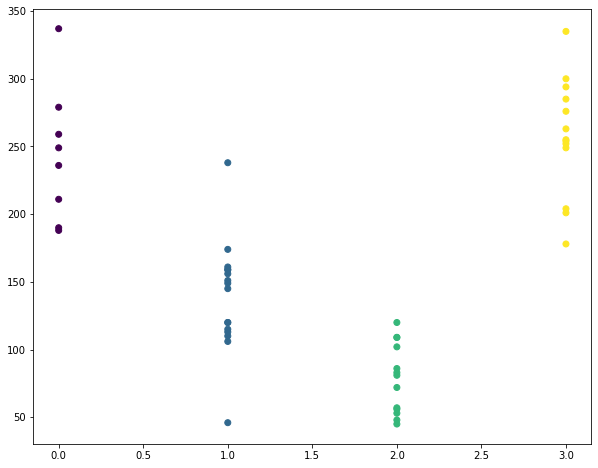

In [94]:
plt.figure(figsize=(10, 8))  
plt.scatter(df['clusters_new'],df['Assault'], c=clusters.labels_) 